In [50]:
import numpy as np
import pandas as pd
data=pd.read_csv('Salary_Data.csv')
data.describe()
# x.shape
# y.shape
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
x = data[['YearsExperience']].values
y = data['Salary'].values
x
# feature_columns = [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [35]:
# shape of feature should be (no. of samples, no. of features)
# changing the shape of x
x = x.reshape(len(x), 1)
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [36]:
# divide data into training and testing dataset
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = 0.80, random_state=1)

In [37]:
# prepare model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
# train the model
model.fit(xTrain, yTrain)

LinearRegression()

In [39]:
# prediction
yPred = model.predict(xTest)

In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(yTest, yPred)
r2

0.7616681465472094

In [41]:
# cross validation
accu = []
for i in range(1, 101):
  xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.80, random_state=i)
  model = LinearRegression()
  model.fit(xTrain, yTrain)
  yPred = model.predict(xTest)
  r2 = r2_score(yTest, yPred)
  accu.append(r2)

accu_array = np.array(accu)
print(accu_array)
accu_array.max()

[0.76166815 0.88869567 0.96950394 0.95044045 0.94396286 0.93681462
 0.81430228 0.96311822 0.93884165 0.98164235 0.94088273 0.94292692
 0.93944603 0.96062158 0.86970124 0.79498902 0.93847448 0.88643306
 0.94155318 0.94412991 0.93985829 0.88707026 0.91841708 0.9520702
 0.95317328 0.98358497 0.96364258 0.92178414 0.94671727 0.9944092
 0.89676495 0.89859957 0.93507856 0.92441414 0.88394765 0.95502111
 0.97782421 0.97247945 0.99283448 0.77750835 0.98025195 0.90244618
 0.86880452 0.93495112 0.92504879 0.97891298 0.98399194 0.98027728
 0.94976703 0.88246796 0.96086247 0.97436467 0.95011549 0.949273
 0.89241371 0.98040674 0.80963515 0.48152205 0.95479901 0.91399254
 0.95052229 0.97195098 0.9582009  0.91400678 0.81127009 0.77822856
 0.95888325 0.97917871 0.87118241 0.94293977 0.96947922 0.95627718
 0.98121431 0.96185917 0.96522429 0.84682703 0.97820123 0.98618366
 0.98066257 0.9356347  0.97604264 0.95610946 0.95324065 0.95356799
 0.97717399 0.974311   0.95346692 0.97707617 0.97442658 0.96767019

0.9944092048209745

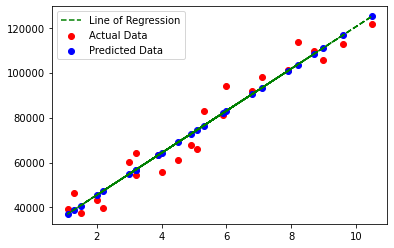

In [54]:
# Drawing Regression line for Training dataset
import matplotlib.pyplot as plt
plt.scatter(xTrain, yTrain, color="red", label="Actual Data")
plt.scatter(xTrain, model.predict(xTrain), color="blue", label="Predicted Data")
plt.plot(xTrain, model.predict(xTrain), '--', color="green", label="Line of Regression")
plt.legend(loc="best")
plt.show()

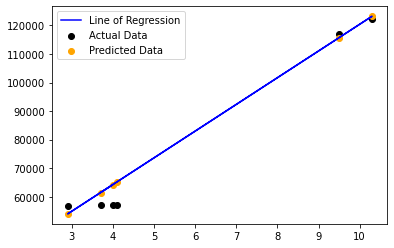

In [46]:
import matplotlib.pyplot as plt

plt.scatter(xTest, yTest, color="black", label="Actual Data")
plt.scatter(xTest, yPred, color="orange", label="Predicted Data")
plt.plot(xTest, yPred, '-', color="blue", label="Line of Regression")
plt.legend(loc="best")
plt.show()

In [47]:
# slop of the line
m = model.coef_ ### slope
b = model.intercept_ ### y-intercept
print(m, b)

[9361.11639032] 26819.06511870089


In [48]:
### Calculating new y
new_y = m*12+b
new_y

array([139152.46180256])

In [49]:
model.predict([[12]])

array([139152.46180256])

In [20]:
### save model 
#import sklearn.external.joblib as extjoblib
import joblib
joblib.dump(model, 'lin_reg.pkl')


['lin_reg.pkl']